# Deskriptive Statistik von [vielen] Linien in einem Bild
Bei der Untersuchung der Intensität entlang vieler Linien in einem Bild kann dies parallel auf einer GPU durchgeführt werden. Dieses Notebook demonstriert dies anhand von nur zwei Linien zu Illustrationszwecken. Es kann davon ausgegangen werden, dass das parallele Auslesen von Hunderten oder Tausenden von Linien auf GPUs leistungsmäßig sinnvoll ist.

In [1]:
import pyclesperanto_prototype as cle
from skimage.data import cells3d
import numpy as np

Um einen möglichen Anwendungsfall zu demonstrieren, betrachten wir ein Bild von Zellen, die einen Membranmarker exprimieren, genauer.

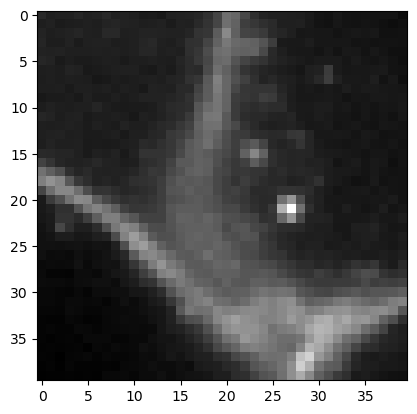

In [2]:
membranes = cells3d()[30, 0, 110:150, 110:150]
cle.imshow(membranes)

Wir definieren Koordinaten von vier Punkten, die zu zwei Linien verbunden werden. Die Verbindung wird mit einer _Touch_-Matrix hergestellt, die es ermöglicht, n Punkte mit n Punkten zu verbinden.

In [3]:
coords = np.asarray([
    [0, 17],  # line 1 start (x, y)
    [10, 24], # line 1 end
    [20, 21], # line 2
    [35, 21]
]).T

In [4]:
connection_matrix = cle.symmetric_maximum_matrix(np.asarray([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0], # this connects the two points of line 1
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1], # this connects the two points of line 2
    [0, 0, 0, 0, 0]
]))
connection_matrix

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

Zuerst visualisieren wir diese Linien über dem Membranbild.

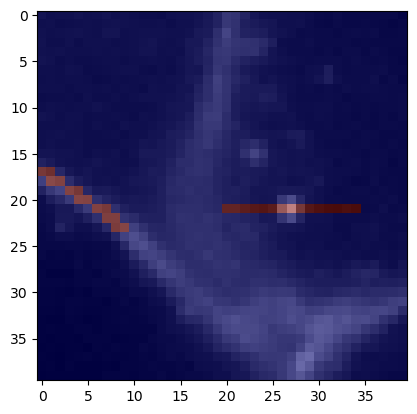

In [5]:
mesh = cle.create_like(membranes)
mesh = cle.touch_matrix_to_mesh(coords, connection_matrix, mesh)

cle.imshow(membranes, continue_drawing=True)
cle.imshow(mesh, alpha=0.5, colormap='jet')

## Messung der mittleren Intensität entlang der Linien
Als Nächstes verwenden wir die oben konfigurierte Matrix, um die durchschnittliche Intensität entlang der Linien zu messen. Wir müssen auch angeben, wie viele Proben entlang der Linien genommen werden sollen.

In [6]:
num_samples = 10

mean_intensity_matrix = cle.generate_mean_intensity_between_points_matrix(
                                membranes, coords, connection_matrix, num_samples=num_samples)
mean_intensity_matrix

cl.OCLArray([[   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. , 7317.8,    0. ,    0. ],
       [   0. , 7317.8,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. , 4482.6],
       [   0. ,    0. ,    0. , 4482.6,    0. ]], dtype=float32)

Wir können diese Messungen auch wieder als Linien visualisieren. Da wir Punkte und Verbindungen zwischen Punkten als Matrix übergeben, ist dies technisch gesehen ein Netz.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
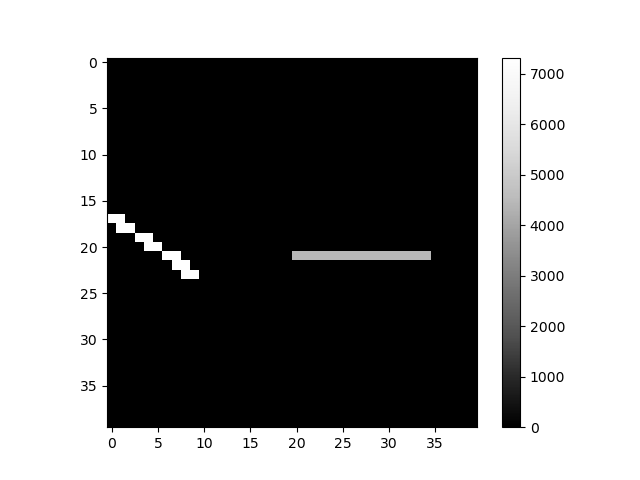
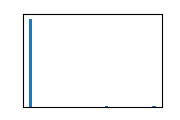

In [7]:
mean_intensity_mesh = cle.create_like(membranes)
mean_intensity_mesh = cle.touch_matrix_to_mesh(coords, mean_intensity_matrix, mean_intensity_mesh)
mean_intensity_mesh

Wir können dieses quantitative Netz auch über dem ursprünglichen Membranbild visualisieren.

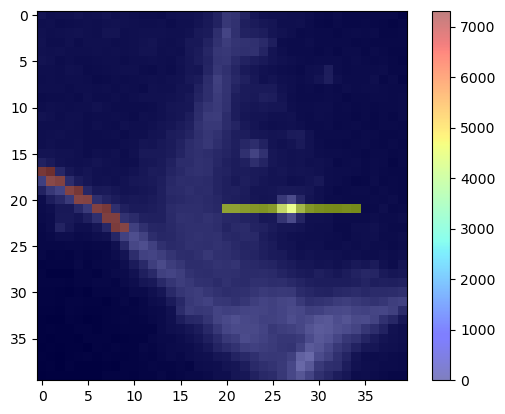

In [8]:
cle.imshow(membranes, continue_drawing=True)
cle.imshow(mean_intensity_mesh, alpha=0.5, colormap='jet', colorbar=True)

## Messung der Standardabweichung der Intensität entlang einer Linie
Das gleiche Verfahren funktioniert auch für die Messung der Standardabweichung entlang der Linien.

In [9]:
stddev_intensity_matrix = cle.generate_standard_deviation_intensity_between_points_matrix(
                                membranes, coords, connection_matrix)
stddev_intensity_matrix

cl.OCLArray([[   0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,  572.79144,    0.     ,    0.     ],
       [   0.     ,  572.79144,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,    0.     ,    0.     , 3758.1768 ],
       [   0.     ,    0.     ,    0.     , 3758.1772 ,    0.     ]],
      dtype=float32)

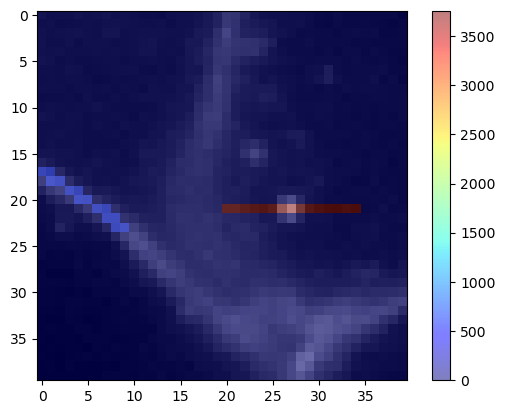

In [10]:
stddev_intensity_mesh = cle.create_like(membranes)
stddev_intensity_mesh = cle.touch_matrix_to_mesh(coords, stddev_intensity_matrix, stddev_intensity_mesh)

cle.imshow(membranes, continue_drawing=True)
cle.imshow(stddev_intensity_mesh, alpha=0.5, colormap='jet', colorbar=True)